In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [ ]:
!wget -O hamshahri.rar "https://drive.google.com/u/0/uc?id=1D3yt99D0GcCRCbdKbUQGxbqjkeh91hTg&export=download&confirm=t&uuid=8cf8ef84-5033-4de3-97dc-588c35004d6c" 

In [ ]:
!unrar x hamshahri.rar

In [ ]:
!unzip hamshahriold/Corpus/Hamshahri-All\ \(SQL\).zip
!unzip hamshahriold/Corpus/Hamshahri-Corpus.zip
!unzip hamshahriold/Corpus/PersianStopWords.zip

Archive:  hamshahriold/Corpus/Hamshahri-All (SQL).zip
   creating: Hamshahri-All (SQL)/
  inflating: Hamshahri-All (SQL)/Hamshahri-Term_Data.MDF  
  inflating: Hamshahri-All (SQL)/Hamshahri-Term_Log.LDF  
Archive:  hamshahriold/Corpus/Hamshahri-Corpus.zip
  inflating: Hamshahri-Corpus.txt    
Archive:  hamshahriold/Corpus/PersianStopWords.zip
  inflating: PersianStopWords.txt    


In [ ]:
# !unzip hamshahriold/Corpus/Hamshahri-Query_Judgement.zip
# !unzip hamshahriold/Corpus/Hamshahri-Query_Judgement_old.zip


In [ ]:
!cat hamshahriold/Corpus/Hamshahri-Sample.txt

﻿.DID	1S1
.Date	75\04\02
.Cat	adabh
جاودانگي در زندگي گروهي از طريق هنر 
نگاهي به نمايشگاه آثار هنري احمد طباطبايي 
موضوع آثار طباطبايي مورچگان هستند ولي در باطن چنين ظاهري، اين 
انسانهاهستند كه در هيبتي حشره گونه در تابلوهاي نقاشي نمايشگر 
گوشه هايي از زندگي خود هستند. 

.DID	2S1
.Date	75\05\02
.Cat	adabh
رويدادهاي هنري جهان 
نمايشگاه هنر در خدمت ديكتاتورها 
نمايشگاه ارتباط بين هنر وقدرت ديكتاتورها در اروپا درشهر برلين 
آغاز به كار كرد. به گزارش واحد مركزي خبر به نقل از شبكه خبري 

.DID	3S1
.Date	75\04\12
.Cat	adabh
برديوار نگارخانه ها 
گالري گلستان: 
نمايشگاه طرح و ساخت نقره وسنگ ثريا امانپور از 5 تيرماه 12تا
از ساعت 9 تا 12 16تا 20 و خيابان دروس شهيدكماسايي شماره 
. تلفن 2541589. 42 
نگارخانه آفرينش سرو: نمايشگاه آثار عكاسي شهريار توكلي و فرشيد 

.DID	4S1
.Date	75\04\02
.Cat	ejtem
بازي را جدي بگيريم 
مطالعه اي مقدماتي پيرامون نقش بازي در زندگي اجتماعي و ساماندهي 
گردشگاهها 
حركت و شلوغ كردن جلوه اي ازلذت كودكانه است، سركوبومخالفت با 
جنب وجوش كودكان بتدريج آسيب رواني به بار مي آورد 

In [ ]:
with open('hamshahriold/ham2/Categories.txt',"r") as content:
    content = content.read()

lines = content.split("\n")
cat_dict = {}
sub_cat = {}

for line in lines:
    if line:
        splited = line.split("\t")
        cat_dict[splited[0]] = (splited[1], splited[2])
        if splited[1] in sub_cat:
            sub_cat[splited[1]].append(splited[0])
        else:
            sub_cat[splited[1]] = [splited[0]]

# cat_dict
# print(sub_cat)
s = dict(sorted(sub_cat.items()))

for key, val in s.items():
    print(key, len(val))

In [ ]:
import re
dict_ = {}
list_of_dict = []

with open('Hamshahri-Corpus.txt',"r") as content:
    content = content.read()
lines = content.split("\n")
lines = [line for line in lines if line]
line_count = len(lines) -1 
  
for index, line in enumerate(lines):
    if '.DID' in line and dict_:
        list_of_dict.append(dict_)
        dict_ = {}

    if '.Cat' in line:
        dict_['category'] = line.split(".Cat\t",1)[1]

    elif not re.match(r"^.[A-Z]", line) and line:
        if 'text' in dict_:
            dict_['text'] += line
        else:
            dict_['text'] = line

    if line_count == index and dict_:
        list_of_dict.append(dict_)
        dict_ = {}

len(list_of_dict)

In [ ]:
import pandas as pd

df = pd.DataFrame(list_of_dict)
df.head(20)
df.to_csv('data.csv')

In [ ]:
df['category_id'] = df['category'].factorize()[0]
df.tail(10)

In [ ]:
df.isna().sum()

category       0
text           0
category_id    0
dtype: int64

In [8]:
category = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category

,category,category_id
0,adabh,0
3,ejtem,1
4,elmfa,2
10,eqtes,3
21,gozar,4
...,...,...
143425,Shari,100
145030,ikabar,101
145782,imaqal,102
150211,igozar,103


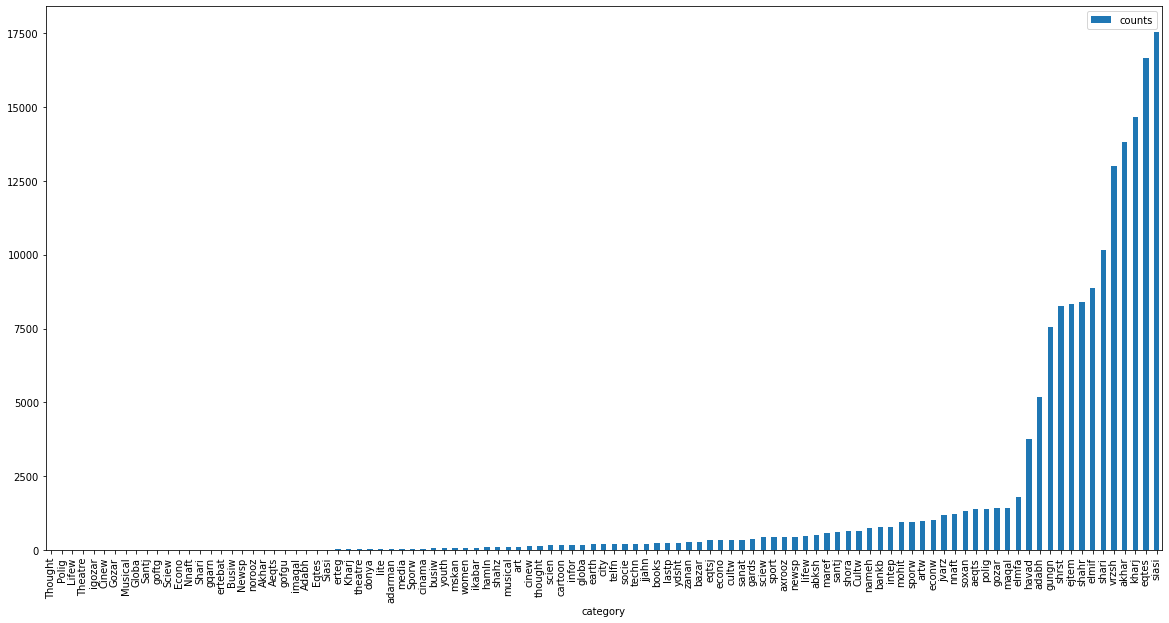

In [ ]:
df.groupby(['category']).size().reset_index(name='counts').sort_values(['counts'], ascending=True).plot(x ='category', y='counts', kind='bar', figsize=(20,10))
# df.groupby(['category']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)[:50].plot(x ='category', y='counts', kind='bar', figsize=(20,10))

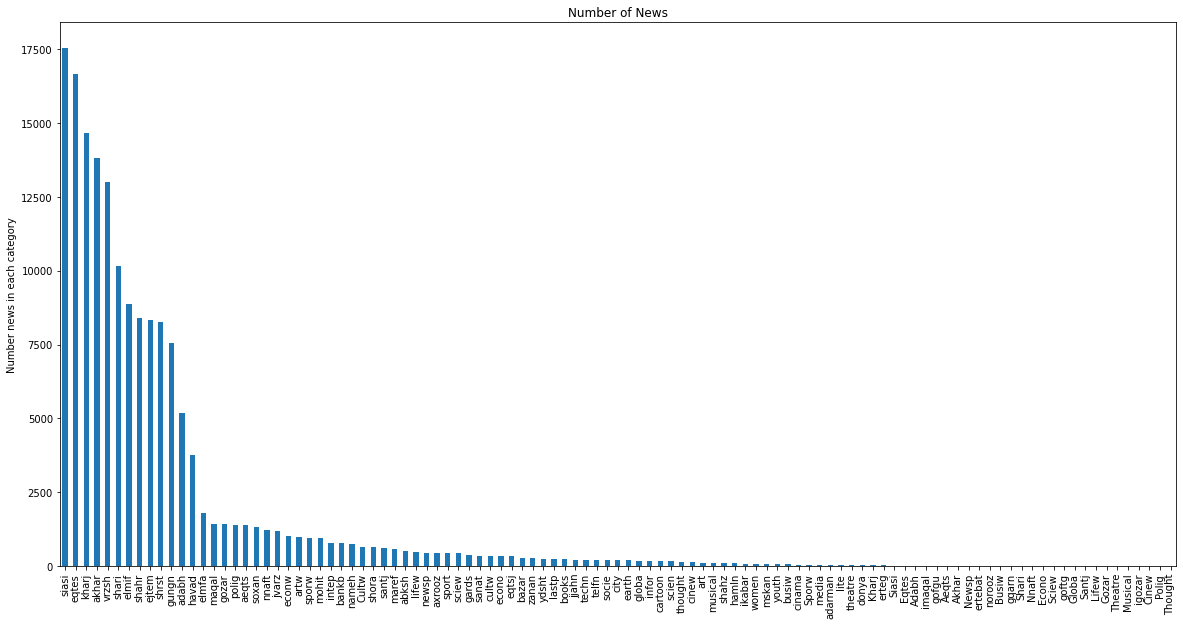

In [ ]:
df['category'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number of News', 
                                                                ylabel='Number news in each category', figsize=(20,10))

In [ ]:
df[df['category'] == 'sciew']

category  \
135853    sciew   
135854    sciew   
135855    sciew   
135856    sciew   
135857    sciew   
...         ...   
165082    sciew   
165083    sciew   
165192    sciew   
165193    sciew   
165194    sciew   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
!cat Hamshahri-Corpus.txt | grep -B 5 -A 5 "روزنامه صبح ايران"

In [ ]:
!cat Hamshahri-Corpus.txt | grep ".Cat" | wc -l

165262


In [ ]:
!cat Hamshahri-Corpus.txt | grep ".DID" | wc -l

165233


In [ ]:
def remove_persian_stopword(tokens):
    # return [word for word in tokens if not word in stop_words and word and word not in proned]
    return [word for word in tokens if not word in stop_words and word]

normalizer = Normalizer()


def normalize_text(text):
    return normalizer.normalize(text)


lemmatizer = Lemmatizer()


def lemma_tokenizer(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]
    # return [lemmatizer.lemmatize(token).split("#")[0] for token in tokens]


stemmer = Stemmer()


def stem_tokenizer(tokens):
    return [stemmer.stem(token) for token in tokens]


def text_normalization(text):
    raw_text = re.sub(r"-+|\d+|\s+", " ", text)
    raw_text = normalize_text(raw_text)

    return raw_text

def tokenize_text(text, type="lemma"):
    tokens = word_tokenize(text)
    tokens = remove_persian_stopword(tokens)
    
    if type == "lemma":
        tokens = remove_persian_stopword(lemma_tokenizer(tokens))
    elif type == "stem":
        tokens = remove_persian_stopword(stem_tokenizer(tokens))

    return tokens


In [ ]:
with open("PersianStopWords.txt", "r") as file:
    raw_stop_words = file.read()

stop_words = raw_stop_words.split("\n")
stop_words = [normalize_text(word) for word in stop_words]
stop_words[:10]

In [2]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 30.1 MB/s 
     |████████████████████████████████| 233 kB 66.0 MB/s 
     |████████████████████████████████| 1.4 MB 54.8 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=b70b5dedd0c50f76100f29a0daa3af268d16ab4ab3f95e05d3aca8786c233931
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154915 sha256=7b056ed868e9143a3bfac3555c475481cbe8e08a61769a7f25fa20757c1f3a3b
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [3]:
import re
import numpy as np
import pandas as pd
from hazm import word_tokenize, Lemmatizer, Stemmer, Normalizer

In [ ]:
df["normalized_sent"] = df["text"].apply(lambda x: text_normalization(x))
df.head()

In [ ]:
df["tokens"] = df["normalized_sent"].apply(lambda x: tokenize_text(x))
df.head()

In [ ]:
df.to_csv('H_data.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !mv H_data.csv hamshahri_dataset.csv
# !cp hamshahri_dataset.csv drive/MyDrive/Colab\ Notebooks

# !sudo apt-get install rar
# !mkdir data_set_hamshahri && mv hamshahri_dataset.csv data_set_hamshahri/
# !rar a hamshahri_dataset.rar hamshahri_dataset.csv
# !cp hamshahri_dataset.rar drive/MyDrive/Colab\ Notebooks

Mounted at /content/drive


In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# df = pd.read_csv('drive/MyDrive/Colab Notebooks/hamshahri_dataset.csv', index_col=0)

Mounted at /content/drive


In [ ]:
df

,category,text,category_id,normalized_sent,tokens
0,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...,0,جاودانگی در زندگی گروهی از طریق هنر نگاهی به ن...,"['جاودانگی', 'زندگی', 'گروهی', 'طریق', 'هنر', ..."
1,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...,0,رویدادهای هنری جهان نمایشگاه هنر در خدمت دیکتا...,"['رویداد', 'هنر', 'جهان', 'نمایشگاه', 'هنر', '..."
2,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...,0,بردیوار نگارخانه‌ها گالری گلستان: نمایشگاه طرح...,"['بردیوار', 'نگارخانه', 'گالری', 'گلستان', 'نم..."
3,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...,1,بازی را جدی بگیریم مطالعه‌ای مقدماتی پیرامون ن...,"['بازی', 'جدی', 'گرفت#گیر', 'مطالعه', 'مقدمات'..."
4,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...,2,تخته سیاه و غباری که سترده نمی‌شود … اشاره; به...,"['تخته', 'سیاه', 'غبار', 'سترده', 'شد#شو', 'اش..."
...,...,...,...,...,...
165220,vrzsh,نماينده فدراسيون جهاني واليبال از ايران هر نظ...,10,نماینده فدراسیون جهانی والیبال از ایران هر نظر...,"['نماینده', 'فدراسیون', 'جهانی', 'والیبال', 'ا..."
165221,vrzsh,شكست نامداران تكواندودر پيكارهاي برتر ليگ گروه...,10,شکست نامداران تکواندودر پیکارهای برتر لیگ گروه...,"['شکست', 'نامدار', 'تکواندودر', 'پیکار', 'برتر..."
165222,vrzsh,ورزشگاه بزرگ دانشگاه آزاد در تهران ساخته مي شو...,10,ورزشگاه بزرگ دانشگاه آزاد در تهران ساخته می‌شو...,"['ورزشگاه', 'بزرگ', 'دانشگاه', 'آزاد', 'تهران'..."
165223,vrzsh,رئيس فدراسيون پزشكي انتخاب شد گروه ورزشي: مجمع...,10,رئیس فدراسیون پزشکی انتخاب شد گروه ورزشی: مجمع...,"['رئیس', 'فدراسیون', 'پزشک', 'انتخاب', 'گروه',..."


In [ ]:
df.drop(['text', 'normalized_sent'], axis=1, inplace=True)

In [ ]:
import ast
x = ast.literal_eval(df.loc[1, 'tokens'])
df["tokens"] = df["tokens"].apply(lambda x: ast.literal_eval(x))

token_df = df["tokens"]
tokens = token_df.explode().dropna().tolist()
print(len(tokens))
tokens[:10]

38677129


['جاودانگی',
 'زندگی',
 'گروهی',
 'طریق',
 'هنر',
 'نگاه',
 'نمایشگاه',
 'آثار',
 'هنر',
 'احمد']

In [ ]:
len(set(tokens))

453875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


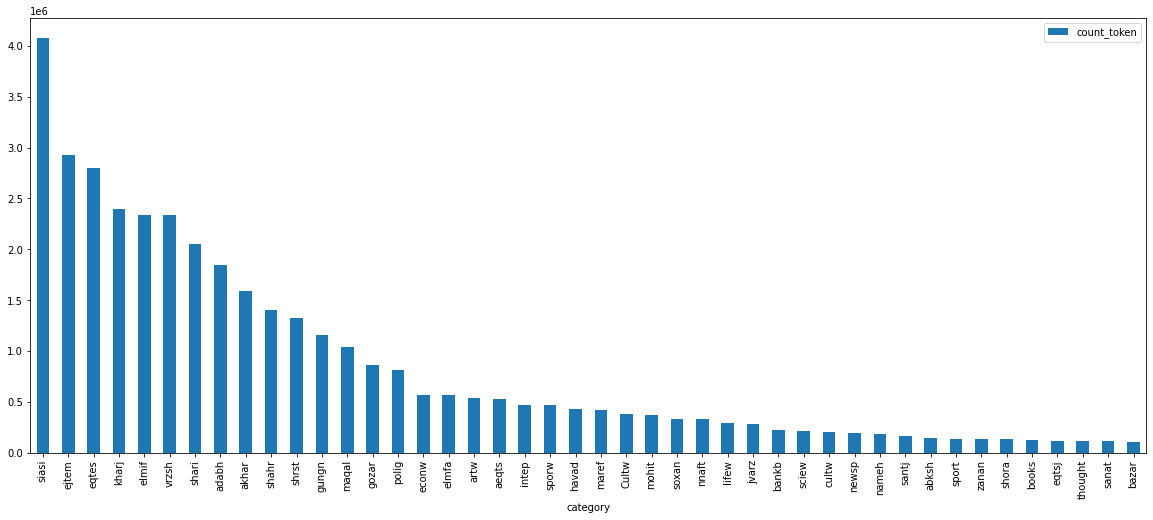

In [13]:
ll = [0 for i in range(105)]
for index, row in df.iterrows():
    ll[row['category_id']] += len(row['tokens'])

category['count_token'] = ll
category.sort_values(by='count_token', ascending=False)[category['count_token'] > 0.1e6].plot(x='category', y='count_token',kind='bar', figsize=(20,8))

In [5]:
# df.to_pickle("drive/MyDrive/Colab Notebooks/hamshahri_DataFrame.pkl")
df = pd.read_pickle("drive/MyDrive/Colab Notebooks/hamshahri_DataFrame.pkl")  

In [6]:
df

,category,category_id,tokens
0,adabh,0,"[جاودانگی, زندگی, گروهی, طریق, هنر, نگاه, نمای..."
1,adabh,0,"[رویداد, هنر, جهان, نمایشگاه, هنر, خدمت, دیکتا..."
2,adabh,0,"[بردیوار, نگارخانه, گالری, گلستان, نمایشگاه, ط..."
3,ejtem,1,"[بازی, جدی, گرفت#گیر, مطالعه, مقدمات, نقش, باز..."
4,elmfa,2,"[تخته, سیاه, غبار, سترده, شد#شو, اشاره;, رغم, ..."
...,...,...,...
165220,vrzsh,10,"[نماینده, فدراسیون, جهانی, والیبال, ایران, نظر..."
165221,vrzsh,10,"[شکست, نامدار, تکواندودر, پیکار, برتر, لیگ, گر..."
165222,vrzsh,10,"[ورزشگاه, بزرگ, دانشگاه, آزاد, تهران, ساخت#ساز..."
165223,vrzsh,10,"[رئیس, فدراسیون, پزشک, انتخاب, گروه, ورزش, مجم..."
